In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import yfinance as yf
import datetime as dt

%matplotlib notebook



In [ ]:


asset = 'AAPL'


def getminutedata(symbol):
    startDate = dt.datetime.now() + dt.timedelta(days=-0.01)
    #print(startDate)
    frame = yf.download(asset, start=startDate, interval='1m')
    #print(frame.tail())
    frame = frame.iloc[:,:6]
    
    #print("despues slicing")
    #print(frame)
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='m')
    frame = frame.astype(float)
    return frame    

def animate(i):
    
    data = getminutedata(asset)
    plt.cla()
    plt.plot(data.index, data.Close)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(asset)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()



In [ ]:
test = getminutedata('TSLA')
print(test.index)

<IPython.core.display.Javascript object>


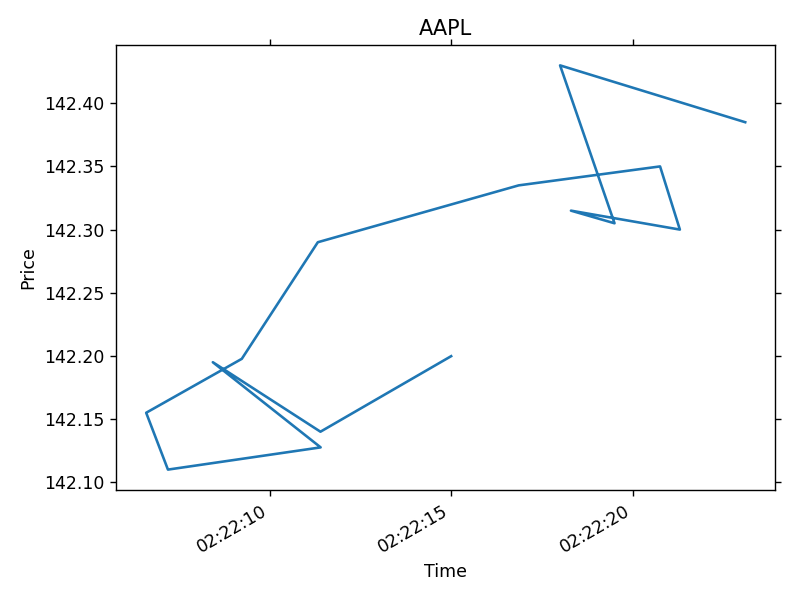

In [7]:

ani = FuncAnimation(plt.gcf(), animate, 1000)

plt.tight_layout()
plt.show()

#print(data.tail())